In [1]:
import sys
import csv
import os
sys.path.insert(0, '..')
import ecoscape_connectivity
from scgt import GeoTiff, Tile

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
DATA_PATH="assets"

HABITAT_PATH = os.path.join(DATA_PATH, "habitat_small.tif")
TERRAIN_PATH = os.path.join(DATA_PATH, "terrain_small.tif")
PERMEABILITY_PATH = os.path.join(DATA_PATH, "terrain_permeability.csv")


In [4]:
with open(PERMEABILITY_PATH, mode='r') as infile:
    reader = csv.reader(infile)
    permeability_dict = {rows[0]:rows[1] for rows in reader}

TILED_CONNECTIVITY_PATH = os.path.join(DATA_PATH, "Outputs/tiled_connectivity.tif")
TILED_FLOW_PATH = os.path.join(DATA_PATH, "Outputs/tiled_flow.tif")
SINGLE_CONNECTIVITY_PATH = os.path.join(DATA_PATH, "Outputs/single_connectivity.tif")
SINGLE_FLOW_PATH = os.path.join(DATA_PATH, "Outputs/single_flow.tif")


Opened GeoTiff file:  assets/habitat_small.tif  with size:  (814, 689)
Opened GeoTiff file:  assets/terrain_small.tif  with size:  (814, 689)
out_bounds: (-2332237.6649, 1844043.24, -2118037.6649, 2020743.24)
Cropped window: 714 589
Opened GeoTiff file:  assets/Outputs/single_connectivity.tif  with size:  (714, 589)
Cropped window: 714 589
Opened GeoTiff file:  assets/Outputs/single_flow.tif  with size:  (714, 589)
Single tile
Return single tile: Tile at (50, 50) of size (714, 589) with border 50
Return single tile: Tile at (50, 50) of size (714, 589) with border 50
Habitat tile: w: 714 h: 589 b: 50 c: 1 x: 50 y: 50
Habitat tile shape (1, 689, 814)
Permeability tile: w: 714 h: 589 b: 50 c: 1 x: 50 y: 50
Permeability tile shape (1, 689, 814)
Writing tile 0 w: 714 h: 589 b: 50 c: 1 x: 50 y: 50
Content: (1, 689, 814)


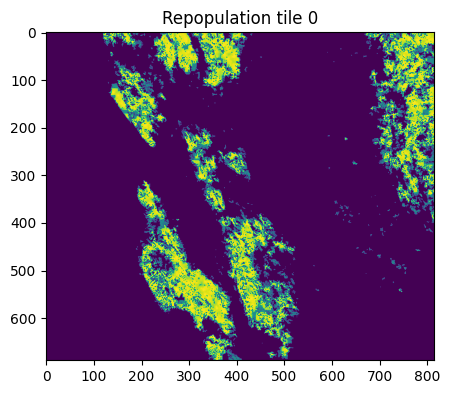

Asking to write a tile of shape: 714 589 at position: 50 50 with border: 50 data shape: (1, 689, 814)
T shape: (1, 589, 714)
T final shape: (1, 589, 714)
Writing to window: 0 0 714 589
The dataset shape is: 714 589


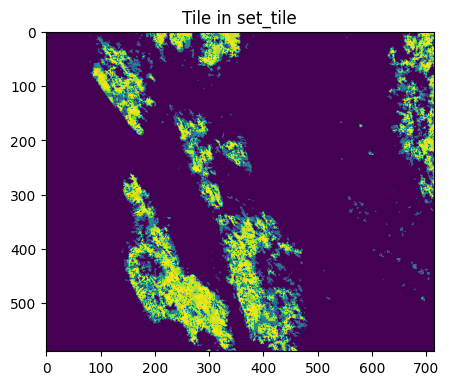

Asking to write a tile of shape: 714 589 at position: 50 50 with border: 50 data shape: (1, 689, 814)
T shape: (1, 589, 714)
T final shape: (1, 589, 714)
Writing to window: 0 0 714 589
The dataset shape is: 714 589


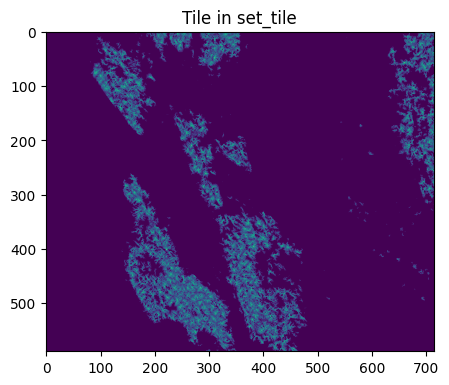

In [5]:
def test_connectivity_single():
    ecoscape_connectivity.compute_connectivity(
        habitat_fn=HABITAT_PATH,
        terrain_fn=TERRAIN_PATH,
        permeability_dict=permeability_dict,
        connectivity_fn=SINGLE_CONNECTIVITY_PATH,
        flow_fn=SINGLE_FLOW_PATH,
        single_tile=True,
        border_size=50,
        num_simulations=2,
        dispersal=ecoscape_connectivity.half_cauchy(10, 40),
    )
test_connectivity_single()

Opened GeoTiff file:  assets/Outputs/single_connectivity.tif  with size:  (714, 589)
Return single tile: Tile at (0, 0) of size (714, 589) with border 0


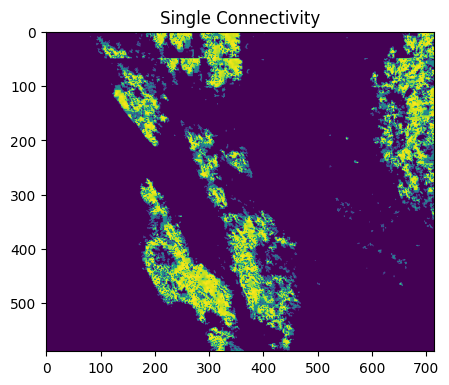

Opened GeoTiff file:  assets/Outputs/single_flow.tif  with size:  (714, 589)
Return single tile: Tile at (0, 0) of size (714, 589) with border 0


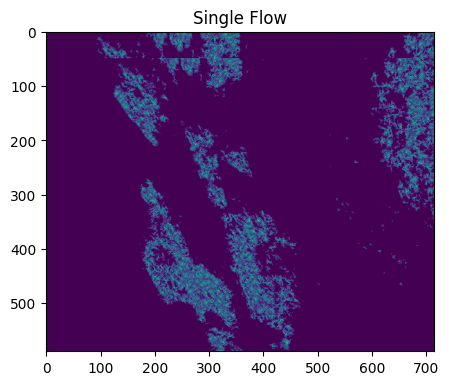

In [6]:
single_connectivity = GeoTiff.from_file(SINGLE_CONNECTIVITY_PATH)
t = single_connectivity.get_all_as_tile(b=0)
t.draw_tile(title="Single Connectivity")
single_flow = GeoTiff.from_file(SINGLE_FLOW_PATH)
t = single_flow.get_all_as_tile(b=0)
t.draw_tile(title="Single Flow")

In [ ]:
def test_connectivity():
    ecoscape_connectivity.compute_connectivity(
        habitat_fn=HABITAT_PATH,
        terrain_fn=TERRAIN_PATH,
        permeability_dict=permeability_dict,
        connectivity_fn=TILED_CONNECTIVITY_PATH,
        flow_fn=TILED_FLOW_PATH,
        single_tile=False,
        border_size=50,
        tile_size=200,
        num_simulations=2,
        dispersal=ecoscape_connectivity.half_cauchy(10, 40),
    )
test_connectivity()

In [ ]:
tiled_connectivity = GeoTiff.from_file(TILED_CONNECTIVITY_PATH)
t = tiled_connectivity.get_all_as_tile(b=0)
t.draw_tile(title="Tiled Connectivity")
tiled_flow = GeoTiff.from_file(TILED_FLOW_PATH)
t = tiled_flow.get_all_as_tile(b=0)
t.draw_tile(title="Tiled Flow")